# How to do Multi-temporal Land Cover Classification without Satellite Data

Random sampling of training and testing data is common practice in machine learning.
However, the data of Land Cover Classification tasks is often spatially corellated.
This correlation introduces a dependence between randomly sampled training and testing dataset.

This notebook illustrates this issue by achieving **99% accuracies** on an originally multi-temporal land cover classification challenge **without using any satellite reflectance data**.

This is an example on data of the [**Time Series Land Cover Classification Challenge (_TiSeLaC_)**](https://sites.google.com/site/dinoienco/tiselc), organized in conjunction of [**ECML-PKDD 2017**](http://ecmlpkdd2017.ijs.si/).


In [113]:
import pandas as pd
import numpy as np
import sklearn.metrics as skmetrics

## Load training data

Download and load training point coordinates (`coord_training.txt`) and labels (`training_class.txt`)

**No need for any Landsat 8 reflectance data**

In [114]:
y_train = np.array(pd.read_csv("training_class.txt",header=-1)).squeeze()
coord_train = np.array(pd.read_csv("coord_training.txt",header=-1))

In [115]:
print("training coordinates (first 10)")
print("")
print("X:")
print(coord_train[0:10,0])
print("Y:")
print(coord_train[0:10,1])
print("")
print("training labels (first 10)")
print("")
print(y_train[0:10])

training coordinates (first 10)

X:
[1745 1062 1450 1469  521 1643 1020 1180  740 1261]
Y:
[1548  639 1540  982 1072 2102 1514 1844 1713 1071]

training labels (first 10)

[ 6.  1.  6.  3.  3.  5.  3.  9.  7.  4.]


## Create Tree to find K=1 Nearest Neighbors

In [167]:
from sklearn.neighbors import BallTree

tree = BallTree(coord_train, leaf_size=2) 

## Load testing data coordinates

In [168]:
coord_test = np.array(pd.read_csv("coord_test.dat",header=-1))

## Get index of the closest training points to the respective test points

The tree was built based on the training coordinates.

In [169]:
dist, ind = tree.query(coord_test, k=1)

## Get the class label of the closest training point

In [170]:
y_pred = np.array(y_train)[ind].squeeze()

## Load ground truth labels and compare with predicted labels

In [172]:
y_true = np.array(pd.read_csv("test.cl",header=-1)).squeeze()

print("test labels (first 15)")
print("")
print(y_true[0:15])
print("")
print("predicted labels (first 15)")
print("aka. label of the closest training point")
print("")
print(y_pred[0:15])

test labels (first 15)

[ 3.  2.  1.  4.  4.  7.  4.  4.  4.  1.  3.  5.  5.  3.  3.]

predicted labels (first 15)
aka. label of the closest training point

[ 3.  2.  1.  4.  4.  7.  4.  4.  4.  3.  3.  5.  5.  4.  3.]


## Quantitative accuracy evaluation

In [173]:
classes = ["urban", "built-up", "forest", "sparse vegetation", "rocks/bare soil", "grassland", "sugarcane", "other crops", "water"]

print(skmetrics.classification_report(y_true,y_pred,digits=4, target_names=classes))

                   precision    recall  f1-score   support

            urban     0.9903    0.9958    0.9930      4000
         built-up     0.9938    0.9985    0.9961       647
           forest     0.9954    0.9695    0.9823      4000
sparse vegetation     0.9947    0.9991    0.9969      3398
  rocks/bare soil     0.9973    0.9992    0.9983      2588
        grassland     0.9732    0.9921    0.9826      1136
        sugarcane     0.9857    0.9876    0.9866      1531
      other crops     0.8580    0.9805    0.9152       154
            water     0.9755    0.9981    0.9867       519

      avg / total     0.9904    0.9902    0.9902     17973



## Visualize the training and testing distributions

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

### Training Points

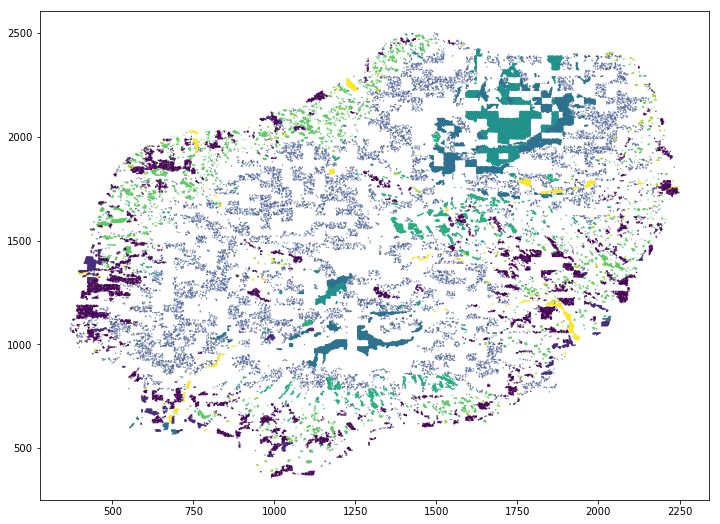

In [175]:
fig = plt.figure(figsize=(12,9))
plt.scatter(coord_train[:,0],coord_train[:,1],s=0.1,c=y_train,marker="o")

### Testing Points

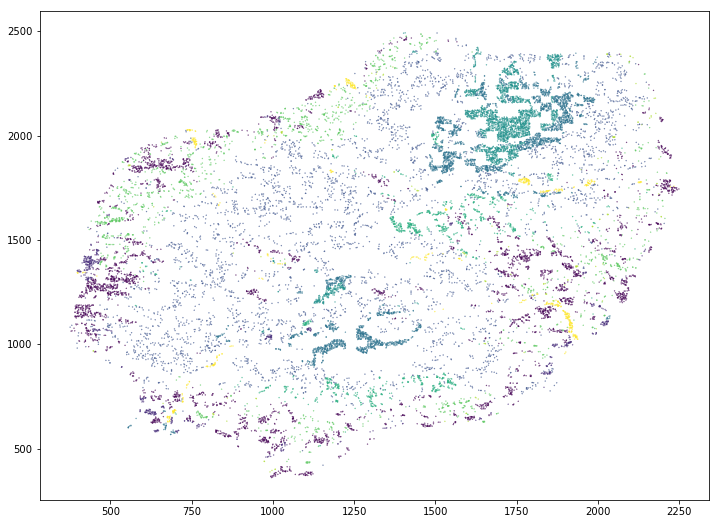

In [176]:
plt.figure(figsize=(12,9))
plt.scatter(coord_test[:,0],coord_test[:,1],s=0.1,c=y_true,marker="o")

### Zoomed in: Training points (o) Test points (x)

(1300, 1400)

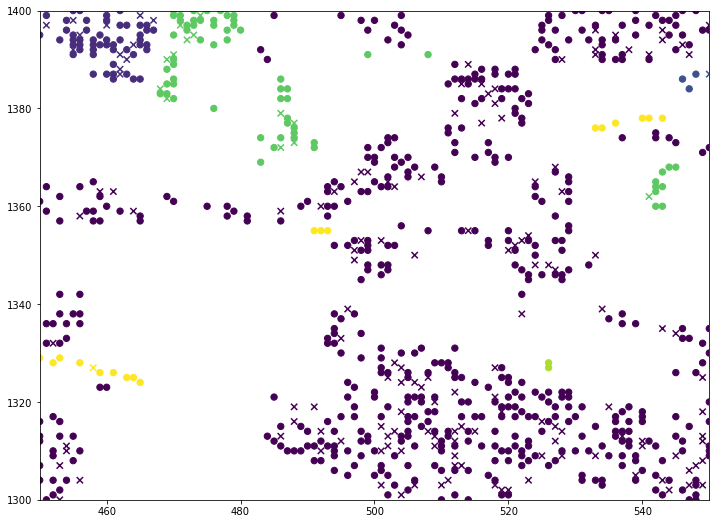

In [179]:
# zoomed aoi
xlim=(450,550)
ylim=(1300,1400)

s = 40

plt.figure(figsize=(12,9))
plt.scatter(coord_train[:,0],coord_train[:,1],s=s,c=y_train,marker="o")
plt.scatter(coord_test[:,0],coord_test[:,1],s=s,c=y_true,marker="x")#'red'
plt.xlim(*xlim)
plt.ylim(*ylim)

(2100, 2200)

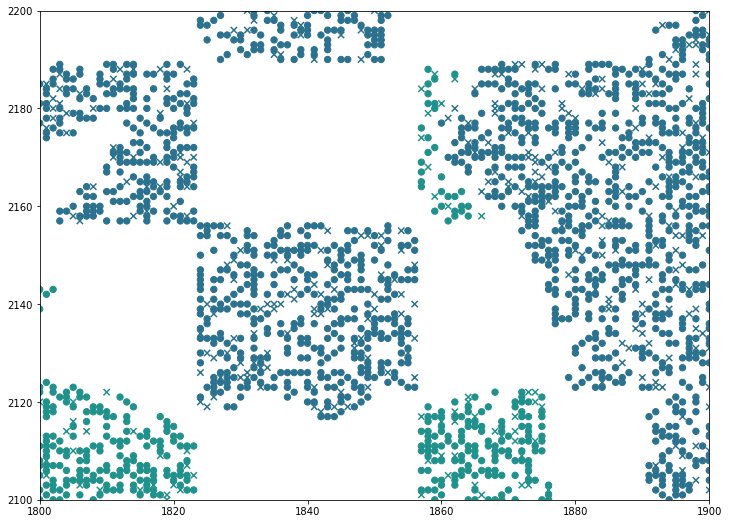

In [180]:
# zoomed aoi
xlim=(1800,1900)
ylim=(2100,2200)

s = 40

plt.figure(figsize=(12,9))
plt.scatter(coord_train[:,0],coord_train[:,1],s=s,c=y_train,marker="o")
plt.scatter(coord_test[:,0],coord_test[:,1],s=s,c=y_true,marker="x")
plt.xlim(*xlim)
plt.ylim(*ylim)